In [149]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from google.colab import drive


# Crando Data Frame

In [150]:
train_csv = 'train.csv'

In [151]:
dataset = pd.read_csv(train_csv)

In [152]:
#dataTrain = pd.read_csv(path)

In [153]:
#from google.colab import files
#files.upload()

In [154]:
#dataset = pd.read_csv("train.csv")

In [155]:
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [156]:
# VALIDANDO CANTIDAD DE TIENDAS Y PRODUCTOS

In [157]:
print(dataset['store'].unique())

[ 1  2  3  4  5  6  7  8  9 10]


In [158]:
print(dataset['item'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [159]:
print(dataset['sales'].unique())

[ 13  11  14  10  12   9   7   5  16  18  15   8   6  21  20  17  22  19
  24  23  26  25  27  38  34  29  31  30   4  36  28  33  32  37  35  43
  40  41  39  42  50  45  44  47  53  49  46  48  51  58  54  57  55  52
   3   2   1  59  56  60  63  69  64  67  65  71  61  73  62  82  78  68
  74  70  87  66  77  88  76  75 102  72  92  86  79  85  81  90  84  80
 103  97  96  95  89 104  94 100  91  83 106 101  98 115  93 111 119  99
 108 110 120 105 126 109 114 113 112 121 107 117 118 139 124 131 123 138
 134 127 136 116 125 122 128 150 129 135 137 132 133 145 130 144   0 148
 141 140 152 147 169 156 159 153 142 157 155 163 143 154 165 146 160 158
 151 164 171 161 177 162 175 181 168 167 149 174 170 176 178 166 173 187
 182 189 179 172 204 180 190 191 210 184 183 186 185 199 196 194 197 207
 209 195 198 231 205 192 200 193 188 208 201 214 206 203 202]


In [160]:
dataset.isnull().values.any()

False

In [161]:
dataset.shape

(913000, 4)

In [162]:
dataset.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [163]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [164]:
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [165]:
# Distribucion por tienda e item

In [166]:
store1 = dataset[dataset['store'] == 1] 

In [167]:
store1.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [168]:
store1 = store1[store1['item'] == 2] 

In [169]:
store1.head()

,date,store,item,sales
18260,2013-01-01,1,2,33
18261,2013-01-02,1,2,43
18262,2013-01-03,1,2,23
18263,2013-01-04,1,2,18
18264,2013-01-05,1,2,34


In [170]:
store1 = dataset.iloc[:, 2:3].values

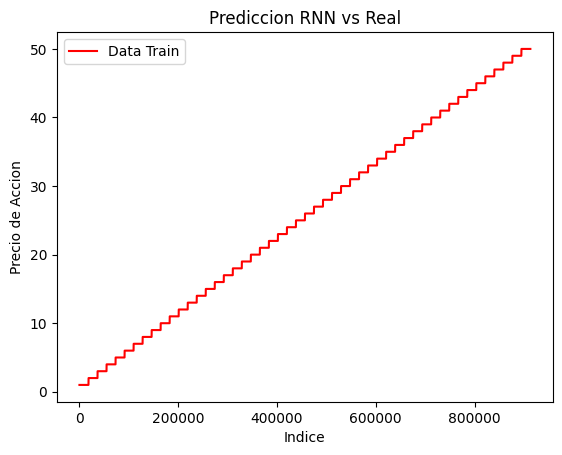

In [171]:
plt.plot(store1, color = 'red', label = 'Data Train' )
plt.title('Prediccion RNN vs Real')
plt.xlabel("Indice")
plt.ylabel("Precio de Accion")
plt.legend()
plt.show()

In [172]:
# INGIENERIA DE CARACTERISTICAS

In [173]:
scaler = MinMaxScaler(feature_range =(0,1))
dataset_scaled = scaler.fit_transform(dataset.iloc[: ,1:4])

In [174]:
dataset_scaled

array([[0.        , 0.        , 0.05627706],
       [0.        , 0.        , 0.04761905],
       [0.        , 0.        , 0.06060606],
       ...,
       [1.        , 1.        , 0.32034632],
       [1.        , 1.        , 0.26839827],
       [1.        , 1.        , 0.35497835]])

In [175]:
fecha = np.asarray(dataset['date'])

In [176]:
#dataset_scaled = np.concatenate((fecha, dataset_scaled))
fecha

array(['2013-01-01T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-03T00:00:00.000000000', ...,
       '2017-12-29T00:00:00.000000000', '2017-12-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [177]:
# SEGMENTACION DE DATA PARA ENTRENAMIENTO

In [178]:
x = dataset.iloc[:, dataset.columns != 'sales']
x = x.iloc[:, x.columns != 'date']
y = dataset.iloc[:,2:3].values

In [179]:
#x = x.values.tolist()
y

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [50],
       [50],
       [50]], dtype=int64)

In [180]:
x_train =x.to_numpy()
print(x_train) 
print(type(x_train))

[[ 1  1]
 [ 1  1]
 [ 1  1]
 ...
 [10 50]
 [10 50]
 [10 50]]
<class 'numpy.ndarray'>


In [181]:
y_train =y
print(y_train) 
print(type(y_train))

[[ 1]
 [ 1]
 [ 1]
 ...
 [50]
 [50]
 [50]]
<class 'numpy.ndarray'>


In [201]:
X_train = []
Y_train = []

#secuenciamos los datos.
cantidad = dataset_scaled.shape[0]
ventana = 30
for i in range(ventana, cantidad):
  X_train.append(dataset_scaled[i - ventana: i, 0])
  Y_train.append(dataset_scaled[i, 0])

In [202]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [206]:
X_train.shape, y_train.shape

((912970, 30), (912970,))

In [207]:
y_train_2da_parte = y_train

In [208]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #reshape para entrada en Keras

In [209]:
y_train.shape,X_train.shape

((912970,), (912970, 30, 1))

In [210]:
#particion de data para entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_train,y_train ,test_size =0.2, random_state = 2022, shuffle = True)

In [211]:
x_train.shape, y_train.shape

((730376, 30, 1), (730376,))

In [191]:
x_train

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.11111111],
        [0.11111111],
        [0.11111111],
        ...,
        [0.11111111],
        [0.11111111],
        [0.11111111]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.11111111],
        [0.11111111],
        [0.11111111],
        ...,
        [0.11111111],
        [0.11111111],
        [0.11111111]],

       [[0.11111111],
        [0.11111111],
        [0.11111111],
        ...,
        [0.11111111],
        [0.11111111],
        [0.11111111]]])

In [192]:
trainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
testX = np.reshape(x_test, (x_test.shape[0],  x_test.shape[1]))

In [193]:
trainX

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111]])

In [138]:
forecaster = Sequential()
#capa1
forecaster.add(LSTM(input_shape=(trainX.shape[1], 1), units=50, return_sequences=True))
#capa2
forecaster.add(LSTM(units=50, return_sequences=True))
#capa3
forecaster.add(LSTM(units=25, return_sequences=True))
#capa4 - NOTAAAAR :) que la capa previa a la salida, no requiere feedback ya que es el resultado final.
forecaster.add(LSTM(units=75, return_sequences=False))
#capa de salida
forecaster.add(Dense(units=1, activation='relu'))

#parametros de optimización
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
#parametros de entrenamiento
forecaster.fit(trainX, y_train, epochs=80, batch_size=32)

Epoch 1/80
22825/22825 [==============================] - 634s 28ms/step - loss: 0.3521
Epoch 2/80
22825/22825 [==============================] - 624s 27ms/step - loss: 0.3521
Epoch 3/80
22825/22825 [==============================] - 621s 27ms/step - loss: 0.3521
Epoch 4/80
22825/22825 [==============================] - 621s 27ms/step - loss: 0.3521
Epoch 5/80
22825/22825 [==============================] - 620s 27ms/step - loss: 0.3521
Epoch 6/80
22825/22825 [==============================] - 619s 27ms/step - loss: 0.3521
Epoch 7/80
22825/22825 [==============================] - 618s 27ms/step - loss: 0.3521
Epoch 8/80
22825/22825 [==============================] - 618s 27ms/step - loss: 0.3521
Epoch 9/80
22825/22825 [==============================] - 619s 27ms/step - loss: 0.3521
Epoch 10/80
22825/22825 [==============================] - 619s 27ms/step - loss: 0.3521
Epoch 11/80
22825/22825 [==============================] - 618s 27ms/step - loss: 0.3521
Epoch 12/80
22825/22825 [=====

In [75]:
#forecaster.save('./RNN_v1.h5')

In [76]:
forecaster.save('./RNN_Final2.h5')

In [221]:
#x_train, x_test, y_train, y_test

dataset_total = np.concatenate((x_train, x_test), axis=0)
#prueba_arreglo = [len(dataset_total) - len(x_test) - ventana ]
dataset_total.shape
#dataset_total = y_train_2da_parte

(912970, 30, 1)

In [218]:
input_test = dataset_total[len(dataset_total) - len(x_test) - ventana  ]
#input_test = input_test.reshape(-1, 1)
#input_test = scaler.fit_transform(input_test)
input_test.shape

()

In [195]:
cantidad_final = len(input_test)
cantidad_final

30

In [91]:
x_test2 = []
for i in range(ventana, cantidad_final):
  x_test.append(input_test[i - ventana:i, 0])

x_test2 = np.array(x_test2)

In [92]:
x_test2.shape

(0,)

In [95]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1]))

IndexError: tuple index out of range

In [222]:
predicciones_rnn = forecaster.predict(dataset_total)
predicciones_rnn

28531/28531 [==============================] - 249s 9ms/step


array([[0.        ],
       [0.00736848],
       [0.00083661],
       ...,
       [0.00434431],
       [0.00517822],
       [0.00170642]], dtype=float32)

In [223]:
predicciones_rnn.shape

(912970, 1)

In [224]:
#invertimos noramalizacion
real_predicted_price = scaler.inverse_transform(predicciones_rnn)
real_predicted_price

array([[1.       ],
       [1.0073684],
       [1.0008366],
       ...,
       [1.0043443],
       [1.0051782],
       [1.0017064]], dtype=float32)

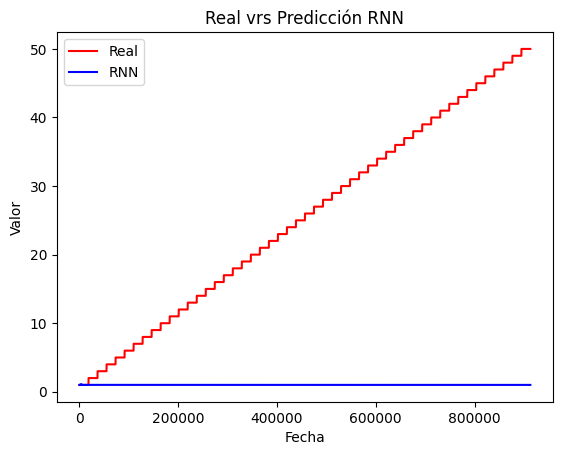

In [225]:
plt.plot(y, color="red", label="Real")
plt.plot(real_predicted_price, color="blue", label="RNN")
plt.title("Real vrs Predicción RNN")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()